# TP5: Procesamiento de datos de small RNA-seq

**Nota**: Este cuaderno asume que el [TP0](https://colab.research.google.com/github/VeronicaNoe/EpiEvo/blob/main/cuadernos/TP0_espacio_de_trabajo.ipynb) ha sido completado con éxito.


# Contenido

**Objetivo:** Familiarizarse con la identificación de pequeños RNAs utilizando datos de secuenciación de la especie silvestre de papa _Solanum kurztianum_.

<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura00_ktz.png" width="400"/> 
</p>

0.   [Introducción](#step-0)
1.   [Preparación del cuaderno](#step-1)
2.   [Preparación del espacio de trabajo en R](#step-2)
3.   [Análisis de datos obtenidos por *sRNAs*](#step-3)
  1.   [Análisis de 21-22 nts](#step-3.1)
  2.   [Análisis de 24 nts](#step-3.2)
  3.   [Exploramos los datos](#step-3.3)
4.   [OPCIONAL: Guardar en Drive](#step-4)



<a name="step-0"></a>
# Introducción


Analizaremos los perfiles de acumulacion de pequenos RNAs (sRNAs) obtenidos a partir de clones de la papa silvestre _Solanum kurtzianum_ que fueron cultivadas dentro de la [Reserva Natural Villavicencio](https://rnvillavicencio.com.ar/2020/11/27/un-sendero-con-una-investigacion-de-fondo/) (Mendoza) en dos jardines experimentales ubicados a distintas altitudes (1100 msnm. vs 2100 msnm; [Ibañez et al., 2020](https://www.nature.com/articles/s41437-020-00355-z.epdf?sharing_token=dG8zGO7n_Ce5emTXQ08extRgN0jAjWel9jnR3ZoTv0MCUs3YZTqBQIBls0HDBuh1-MhUNe_GoS8CV-HVB4GfcBsumY1HfytV9uB0svFhDZGCFxWehIn4QPwKajc_gzFNadchnJz5CySlKFg47-IY4E559lTGc6ho1DEYNprkyCA%3D)). 

Este gradiente altitudinal genera diferencias en los niveles de radiacion UV-B (10%) y en las temperaturas medias (35%). Se observaron diferencias morfológicas, productivas y químicas incluyendo aumentos en área foliar, número y tamaño de tubérculos en las plantas crecidas a 2100 mts vs. las crecidas a 1100 mts. 

El material vegetal consta de 3 réplicas biológicas para cada jardin experimental las cuales denominamos:

**2S, 7S, 18S** para el jardin **S** a **1100 msnm**

**4A, 8A, 12A** para el jardin **A** a **2100 msnm**

<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/TP_05_A.
png" width="600"/> 
</p>

Los sRNAs fueron separados por tamaño según su biogénesis y modo de acción **(21-22nt)** y **(24nt)** y serán analizados los perfiles de acumulación diferencial **(DA)** entre los dos ambientes asociándolos a dos tipos de regiones genómicas o "features". 


Por un lado exploraremos el perfil de sRNAs de 21-22nt asociados a RNAs mensajeros (mRNAs) entre ambas condiciones.

Por otro lado analizaremos el perfiles de sRNAs de 24nt asociados a promotores entre ambas condiciones.

## Clasificación y función de sRNAs en plantas

Las principales clases de sRNAs en plantas son los **microRNAs**, los **siRNAs secundarios** (21-22nt) y los **hetsiRNAs** (pequeños RNAs heterocromaticos) de 24nt:

- Los `miRNAs` están involucrados en el silenciamiento post transcripcional (PTGS) mediante el corte de transcriptos y por represión traduccional.
- Los `siRNAs` secundarios también están involucrados en el corte o represión traduccional de genes targets en *cis* o en *trans* pero tienen otras vías de biogénesis. A su vez pueden iniciar silenciamiento traduccional (TGS) mediante la metilación del ADN.
- Los `hetsiRNAs` están involucrados en el silenciamiento de regiones repetitivas, transposones y promotores mediante el mecanismo de metilación del ADN dirijido por ARNs (RdDM).

<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura0.png" width="600"/> 
</p>

## sRNA-Seq


## 1. Preparación de las muestras

Se extrae el RNA total, se corre en un gel de poliacrilamida, se selecciona y corta por tamaño.

(figura1)
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura1.png" width="300"/> 
</p>



##2. Preparación de las bibliotecas

Se utilizan kits comerciales específicos para cada tipo de experimento para el armado de las bibliotecas, las cuales constan de el pegado de adaptadores específicos, la retrotranscripción del ARN a ADN y la amplificación por PCR.

(figura1 y 2)
<div id="image-table">
    <table>
      <tr>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura1.png" width="400"/> 
            <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura2.png" width="400"/> 
            </td>
        </tr>
    </table>
</div> 



##3. Secuenciación

Se utilizan secuenciadores de alta procesividad (NGS) (Next Generation Sequencing) los cuales varian segun las necesidades de profundidad de secuenciación que se requiera para cada experimento

(figura1, 2 y 3)
<div id="image-table">
    <table>
      <tr>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura1.png" width="600"/> 
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura2.png" width="600"/>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura3.png" width="600"/> 
            </td>
        </tr>
    </table>
</div> 




##4. Análisis bioinformáticos

Se utilizan "pipelines" bioinformáticas que constan de diversos pasos: principalmente del control de calidad de las secuencias y remoción de adaptadores, mapeo de las "reads" al genoma de referencia, obtención de una matriz de conteos y analisis de expresión (o acumulación) diferencial entre distintas condiciones o tratamientos

(figura1, 2, 3 y 4)
<div id="image-table">
    <table>
      <tr>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura1.png" width="600"/> 
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura2.png" width="600"/>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura3.png" width="600"/> 
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura4.png" width="600"/> 
            </td>
        </tr>
    </table>
</div> 


## Pipeline bioinformática
#### 4.1. Raw data

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura5.png" width="1000"/> 
</p>

Comparación de datos crudos de sRNA-seq vs. RRBS

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura6.png" width="1200"/> 
</p>


#### 4.2. Control de calidad, remocion de adaptadores y filtrado por tamaño

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura7.png" width="500"/> 
</p>

Ejemplo de código utilizado:

```
java -jar /Documents/software/Trimmomatic-0.36/trimmomatic-0.36.jar SE -phred33 -threads 12 sar395-2019_S1_001.fastq.gz sar395-2019_S2_001.fastq.gz sar395-2019_S3_001.fastq.gz 1-2S_trimmed.fastq.gz 1-7S_trimmed.fastq.gz 1-18S_trimmed.fastq.gz ILLUMINACLIP:/home/diego/Documents/software/Trimmomatic-0.36/adapters/TruSeq3-SE.fa:2:30:5 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:20 MINLEN:18
```



Ejemplo de código utilizado:

* filtro 21-22 nt

```
awk 'BEGIN {OFS = "\n"} {header = $0 ; getline seq ; getline qheader ; getline qseq ; if (length(seq) >= 21 && length(seq) <= 22) {print header, seq, qheader, qseq}}' < 1-2S_trimmed.fastq > 1-2S_21-22nt.fq
```

* filtro 24 nt

```
awk 'BEGIN {OFS = "\n"} {header = $0 ; getline seq ; getline qheader ; getline qseq ; if (length(seq) >= 24 && length(seq) < 25) {print header, seq, qheader, qseq}}' < 1-2S_trimmed.fastq > 1-2S_24nt.fastq
```


Distribucion de tamaños de sRNAs

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura18.png" width="700"/> 
</p>



### 3. Mapeo al genoma de referencia de las reads

Se utilizará el software [**ShortStack**](https://github.com/MikeAxtell/ShortStack) basado en el artículo [Johnson et al., 2016](https://academic.oup.com/g3journal/article/6/7/2103/6027713?login=true)

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura8_B.png" width="800"/> 
</p>


### Fig.A
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura9.png" width="800"/> 
</p>
</p>

### Fig.B
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura10.png" width="800"/> 
</p>

### Fig.C
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura11.png" width="800"/> 
</p>

### Fig.D
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura12.png" width="800"/> 
</p>

### Fig.E
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura13.png" width="800"/> 
</p>


Ejemplo de código de utilizado para el mapeo:


```
ShortStack --readfile 1-2S_21-22nt.fq --genomefile Solanum_tuberosum.fa --bowtie_cores 14 --mmap u --locifile Solanum_tuberosum_gene.tab --outdir ./1200mts_mRNA/1-2S_21-22nt/
```

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura14.png" width="1000"/> 
</p>

.sam file
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/TP_5_sam.png" width="1000"/> 
</p>

.gff3 file
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/TP_5_gff3.png" width="1000"/> 
</p>




### Exploramos la salida:

OUTPUT FILES


Todos los archivos se guardan en una carpeta creada por ShortStack que se específica al correrlo con la opción `--outdir`

* **Log file**

    Escribe y graba los pasos de la corrida.

* **ErrorLogs**
    
    Escribe los posibles errores que hayan surgido durante la corrida.

* **Results file**
    
    *Results.txt* es un archivo de texto plano delimitado por tab que contiene los resultados del analisis. Las principales columnas contienen los datos de:



    1. Locus: Coordinates of the locus in format Chr:Start-Stop

    2. Name: Name of the locus

    3. Length: Length of the locus (nts)

    4. Reads: Total number of primary alignments in the locus

    5. RPM: Total number of primary alignments normalized to reads per
    million. Note the the normalization factor includes all primary
    alignments .. both mapped and unmapped.

    6. UniqueReads: Number of uniquely aligned primary alignments in locus.

    7. FracTop: Fraction of primary alignments aligned to the top genomic
    strand

    8. Strand: Strand call for the locus

    9. MajorRNA: Most abundant RNA at locus. In cases of tie, MajorRNA is
    arbitrarily chosen from the tied entries.

    10. MajorRNAReads: Number of primary alignments for the MajorRNA.

    11. Complexity: A number >0 and <= 1 that reflects the complexity of
    small RNA production from the locus. Defined by
    (n_distinct_read_sequences) / (abundance of all reads). Lower numbers
    indicate loci that are more dominated by a single highly abundant RNA.

    12. DicerCall: If >= 80% of the primary alignments were reads >=
    dicermin and <= dicermax, DicerCall is a number that indicates the
    predominant size of the RNA population from the locus. If the 80%
    threshold was not met, then DicerCall is N instead. Can also be NA if
    the locus had no aligned reads.

    13. MIRNA: Results of MIRNA analysis. Codes starting with N indicate not
    a MIRNA, Y means yes. See above for full description of codes.

    14. PhaseScore: Phasing score for a phase size of 21 or 24nts according
    to a modified version of equation 3 of Guo et al (2015) doi:
    10.1093/bioinformatics/btu628. If the locus had a DicerCall of 21, phase
    score is for a 21 nt phasing register. If the locus had a DicerCall of
    24, the phase score is for a 24 nt phasing register. See above for full
    description of phasing analysis.

    15. Short: Number of primary alignments that were shorter than
    --dicermin

    16. Long: Number of primary alignments that were longer than --dicermax

    17-end: Number of primary alignments of the indicated RNA size.   


*Results.txt*
<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura15.png" width="2000"/> 
</p>

* **Counts file**

   *Counts.txt* es un archivo de texto plano delimitado por tab que contiene las cuentas crudas para cada locus del tratamiento o réplica mapeada.

*Counts.txt*
<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura16.png" width="500"/> 
</p>

* **Bam or Cram alignment file**
    Archivo con el alineamiento de las secuencias al genoma de referencia

Vamos a usar los archivos *Counts.txt* correspondientes a cada réplica y tratamiento (luego de una pequeña modificación para que queden solo dos columnas: "feature y cuentas cruedas" como input para el paquete **edgeR** del repositorio [Bioconductor](https://www.bioconductor.org/) el cual da soporte de herramientas bioinformáticas para el análisis de datos genómicos. 

*2S_21-22nt.count*

<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura17.png" width="300"/> 
</p>
    



<a name="step-1"></a>
# Preparación del cuaderno

Un opción útil para el resto de los TPs es la posibilidad de contectar un cuaderno con Google Drive.

Los siguientes pasos muestran cómo realizar dicha conexión:

1. Presionar el botón play, cliquea el enlace mostrado en `Go to this URL in a browser`.
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/0/00_paso1a.png" width="550"/>

2. Copie el código de autenticación.
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/0/00_paso1b.png" width="550"/>

3. Ingresar dicho código en el campo `Enter authorization code`.
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/0/00_paso1c.png" width="550"/>

In [ ]:
#@title Solicitar acceso a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para trabajar de forma ordenada, se crearán 3 carpetas en colab:
- *rawData*: en donde estarán los archivos necesarios para trabajar (**input**)
- *results*: en donde se guardarán los archivos generados (**output**)
- *plots*: en donde se guardarán los pdf de las figuras (**output**)

In [ ]:
#@title Desde el navegador de la derecha, revisar los directorios
%%bash
mkdir {rawData,plots,results}
rm -r sample_data/ # eliminarmos la carpeta que está por default en colab
ls

drive
plots
rawData
results


En el directorio *rawData* cargaremos los inputs



In [ ]:
#@title Cargar archivos
#@title Descargar archivos en el directorio
%%bash
cp -r /content/drive/MyDrive/EpiEvo/epievo_data/5/* /content/rawData
echo 'Lista de archivos en rawData/'
ls rawData

Lista de archivos en rawData/
12A_21-22nt.count
12A_24nt.count
18S_21-22nt.count
18S_24nt.count
2S_21-22nt.count
2S_24nt.count
4A_21-22nt.count
4A_24nt.count
7S_21-22nt.count
7S_24nt.count
8A_21-22nt.count
8A_24nt.count
targets


<a name="step-1"></a>
# Preparación del espacio de trabajo en R




In [ ]:
#@title Cargar R
%load_ext rpy2.ipython

In [ ]:
%%R
#@title Instalar paquetes, cargar librerías y establecer directorio de trabajo
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("edgeR", quiet=TRUE)
# Cargar librerías
suppressPackageStartupMessages({
  library ("edgeR")
  library("graphics")
})
# Establecer el directorio de trabajo
setwd("/content/results")
getwd()


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.16.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 262502 bytes (256 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


Update all/some/none? [a/s/n]: n
[1] "/content/results"


<a name="step-3"></a>
# Análisis de datos obtenidos por *sRNAs*

<a name="step-3.1"></a>
## Análisis de 21-22 nts

Listamos todos los archivos disponibles. Hay uno para cada muestra para cada set de sRNAs:
- 2 jardines experimentales (A-2100mts y S-1100mts)
- 3 réplicas biológicas para cada localidad (2S,7S,18S // 4A,8A,12A)
- 2 set de sRNA (21-22nt // 24nt)

Comenzaremos con el de 21-22nts, paso a paso, para el de 24, es lo mismo y se puede escornder todo en una función.


In [ ]:
%%R
#@title Leer archivo de los targets
inFile<-list.files(path="/content/rawData",pattern = ".count$")
sRNAtype<-c("21-22nt", "24nt")
targets<-read.table("/content/rawData/targets", header = TRUE, stringsAsFactors = FALSE)
rownames(targets)<-targets$files
head(targets)

                              files group description
2S_21-22nt.count   2S_21-22nt.count     S     1100mts
7S_21-22nt.count   7S_21-22nt.count     S     1100mts
18S_21-22nt.count 18S_21-22nt.count     S     1100mts
4A_21-22nt.count   4A_21-22nt.count     A     2100mts
8A_21-22nt.count   8A_21-22nt.count     A     2100mts
12A_21-22nt.count 12A_21-22nt.count     A     2100mts


In [ ]:
%%R
#@title Leer archivos de cuentas con readDGE
toKeep<-grep(sRNAtype[1], inFile, value=TRUE)
subTarget<-targets[toKeep,]
d_mRNAs <- readDGE(subTarget, path="/content/rawData")
d_mRNAs

An object of class "DGEList"
$samples
                              files group description lib.size norm.factors
12A_21-22nt.count 12A_21-22nt.count     A     2100mts   249158            1
18S_21-22nt.count 18S_21-22nt.count     S     1100mts  2062142            1
2S_21-22nt.count   2S_21-22nt.count     S     1100mts   287382            1
4A_21-22nt.count   4A_21-22nt.count     A     2100mts   284595            1
7S_21-22nt.count   7S_21-22nt.count     S     1100mts   312164            1
8A_21-22nt.count   8A_21-22nt.count     A     2100mts   281090            1

$counts
                      Samples
Tags                   12A_21-22nt.count 18S_21-22nt.count 2S_21-22nt.count
  PGSC0003DMG400015133                 0                 6                2
  PGSC0003DMG400015132                 0                16                0
  PGSC0003DMG400022764                 3               130                6
  PGSC0003DMG400022799                 0                 1                0
  PGSC0003D

In [ ]:
%%R
#@title Asigna nombres a las columnas
## Asigna nombres a las columnas
colnames(d_mRNAs) <- gsub(paste0("_",sRNAtype[1],".count"),"",colnames(d_mRNAs))
d_mRNAs

An object of class "DGEList"
$samples
                files group description lib.size norm.factors
12A 12A_21-22nt.count     A     2100mts   249158            1
18S 18S_21-22nt.count     S     1100mts  2062142            1
2S   2S_21-22nt.count     S     1100mts   287382            1
4A   4A_21-22nt.count     A     2100mts   284595            1
7S   7S_21-22nt.count     S     1100mts   312164            1
8A   8A_21-22nt.count     A     2100mts   281090            1

$counts
                      Samples
Tags                   12A 18S 2S 4A 7S 8A
  PGSC0003DMG400015133   0   6  2  0  1  0
  PGSC0003DMG400015132   0  16  0  4  1  2
  PGSC0003DMG400022764   3 130  6  3  6  5
  PGSC0003DMG400022799   0   1  0  0  0  0
  PGSC0003DMG400022786   0   6  3  1  0  3
39023 more rows ...



In [ ]:
%%R
#@title Dimension del objeto
dim(d_mRNAs)

[1] 39028     6


In [ ]:
%%R
#@ title Filtrado por expresión

## Filtra por expresion las cuentas en un numero minimo de muestras (3 en este caso porque el numero minimo de muestras en cada grupo)
keep_mRNA_fbe <- filterByExpr(d_mRNAs)
## arma un nuevo objeto con las cuentas filtradas
d_mRNAs_fbe <- d_mRNAs[keep_mRNA_fbe, keep.lib.sizes=FALSE]
## exploramos la nueva dimension del objeto
dim(d_mRNAs_fbe)


[1] 1225    6


In [ ]:
%%R
#@title Miramos el objeto filtrado
d_mRNAs_fbe  

An object of class "DGEList"
$samples
                files group description lib.size norm.factors
12A 12A_21-22nt.count     A     2100mts   224465            1
18S 18S_21-22nt.count     S     1100mts   763166            1
2S   2S_21-22nt.count     S     1100mts   256810            1
4A   4A_21-22nt.count     A     2100mts   258803            1
7S   7S_21-22nt.count     S     1100mts   283758            1
8A   8A_21-22nt.count     A     2100mts   250800            1

$counts
                      Samples
Tags                   12A   18S  2S  4A  7S  8A
  PGSC0003DMG400022779  18   432  11  14  11  20
  PGSC0003DMG400022785 113    70  36  80  49  84
  PGSC0003DMG400019970  69   153  72  90  66  70
  PGSC0003DMG400019972  37   299  12  19  14  14
  PGSC0003DMG400032132 223 11660 385 206 165 379
1220 more rows ...



In [ ]:
%%R
#@ title Normalización
## Calcula un factor de escala para convertir las lecturas crudas a normalizadas. Un factor de normalizacion <1 indica que un reducido numero de genes 
## tiene alto numero de cuentas las cuales monopolizaron las secuenciacion
d_mRNAs_fbe <- calcNormFactors(d_mRNAs_fbe)
## exploramos el objeto normalizado
d_mRNAs_fbe

An object of class "DGEList"
$samples
                files group description lib.size norm.factors
12A 12A_21-22nt.count     A     2100mts   224465    1.0963886
18S 18S_21-22nt.count     S     1100mts   763166    1.0840809
2S   2S_21-22nt.count     S     1100mts   256810    1.0680429
4A   4A_21-22nt.count     A     2100mts   258803    0.8920393
7S   7S_21-22nt.count     S     1100mts   283758    0.8230485
8A   8A_21-22nt.count     A     2100mts   250800    1.0729406

$counts
                      Samples
Tags                   12A   18S  2S  4A  7S  8A
  PGSC0003DMG400022779  18   432  11  14  11  20
  PGSC0003DMG400022785 113    70  36  80  49  84
  PGSC0003DMG400019970  69   153  72  90  66  70
  PGSC0003DMG400019972  37   299  12  19  14  14
  PGSC0003DMG400032132 223 11660 385 206 165 379
1220 more rows ...



png 
  2 


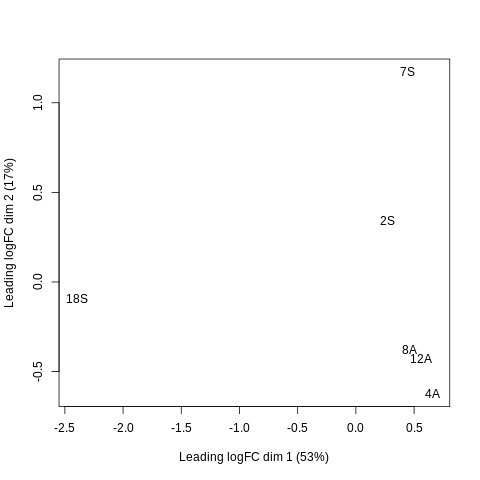

In [ ]:
%%R
#@title plot PCA
## plotea en un PCA las distancias entre los perfiles de expresion de las muestras en logFC
## MDS=Multidimensional scaling
plotMDS(d_mRNAs_fbe)
pdf(paste0("/content/plots/",sRNAtype[1],"_PCA.pdf"))
plotMDS(d_mRNAs_fbe)
dev.off()

In [ ]:
%%R
#@title Estimación de la dispersión
# estimo la dispersón común
d_mRNAs_fbe <- estimateCommonDisp(d_mRNAs_fbe)
# estimo la dispersión específica de genes
d_mRNAs_fbe <- estimateTagwiseDisp(d_mRNAs_fbe)
# estimo la dispersión de la tendencia de los genes
d_mRNAs_fbe <- estimateTrendedDisp(d_mRNAs_fbe)
## exploramos las dispersiones
d_mRNAs_fbe

An object of class "DGEList"
$samples
                files group description lib.size norm.factors
12A 12A_21-22nt.count     A     2100mts   224465    1.0963886
18S 18S_21-22nt.count     S     1100mts   763166    1.0840809
2S   2S_21-22nt.count     S     1100mts   256810    1.0680429
4A   4A_21-22nt.count     A     2100mts   258803    0.8920393
7S   7S_21-22nt.count     S     1100mts   283758    0.8230485
8A   8A_21-22nt.count     A     2100mts   250800    1.0729406

$counts
                      Samples
Tags                   12A   18S  2S  4A  7S  8A
  PGSC0003DMG400022779  18   432  11  14  11  20
  PGSC0003DMG400022785 113    70  36  80  49  84
  PGSC0003DMG400019970  69   153  72  90  66  70
  PGSC0003DMG400019972  37   299  12  19  14  14
  PGSC0003DMG400032132 223 11660 385 206 165 379
1220 more rows ...

$common.dispersion
[1] 0.4588161

$pseudo.counts
                      Samples
Tags                         12A        18S        2S        4A        7S
  PGSC0003DMG400022779

png 
  2 


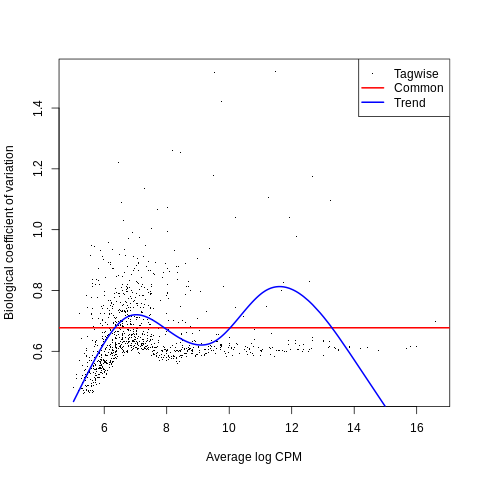

In [ ]:
%%R
#@title plot BCV
## ploteamos el coeficiente de variacion biologica y las dispersiones
plotBCV(d_mRNAs_fbe)
pdf(paste0("/content/plots/",sRNAtype[1],"_BCV.pdf"))
plotBCV(d_mRNAs_fbe)
dev.off()

El Coeficiente de Variación Biológica, mide para cada tag la dispersión de los datos en función a su nivel de expresión. En gral, cuanto más expresión (o acumulación), menor dispersion hay.

```
     Tags                  2S      7S    18S        4A     8A     12A
  PGSC0003DMG400022779    40.09  63.92  25.54     105.85  95.34  140.15

  
  ```

In [ ]:
%%R
#@title Test de pares entre los grupos (acumulación diferencial)
et_mRNAs_fbe <- exactTest(d_mRNAs_fbe, dispersion = "tagwise")
head(et_mRNAs_fbe)


An object of class "DGEExact"
$table
                          logFC    logCPM      PValue
PGSC0003DMG400022779  1.5602290  7.176451 0.123123108
PGSC0003DMG400022785 -1.4021018  8.034961 0.063957141
PGSC0003DMG400019970 -0.3526996  8.140092 0.628686004
PGSC0003DMG400019972  0.7258672  7.049185 0.453694035
PGSC0003DMG400032132  2.3372006 11.663670 0.021555344
PGSC0003DMG400032155  2.6657901  6.763205 0.006542913

$comparison
[1] "A" "S"



In [ ]:
%%R
#@title Differentialy Expressed Loci corregido por comparaciones múltiples (FDR)
topDEL<-topTags(et_mRNAs_fbe, n=300000) 
write.table(topDEL,paste0("topTags_",sRNAtype[1],".csv"), quote=FALSE, sep="\t")
head(topDEL)

Comparison of groups:  S-A 
                         logFC    logCPM       PValue          FDR
PGSC0003DMG400001215  9.288474  9.061231 1.909061e-12 2.338600e-09
PGSC0003DMG400010983 -4.808269  7.581087 1.411066e-05 7.575553e-03
PGSC0003DMG400004552  6.024801 11.913282 1.855237e-05 7.575553e-03
PGSC0003DMG400016867 -3.854771  6.365928 3.797484e-05 9.786566e-03
PGSC0003DMG401018057 -4.899295  7.525641 3.994517e-05 9.786566e-03
PGSC0003DMG400016374 -3.371021  5.131716 6.151830e-05 1.255999e-02


In [ ]:
%%R
#@title Escribe el archivo con las cuentas por millon de cada replica
sRNA_cpm <- cpm(d_mRNAs_fbe)[rownames (topDEL),]
write.table(sRNA_cpm,paste0("cpm_",sRNAtype[1],".csv"), quote=FALSE, sep="\t")
head(sRNA_cpm)


                      Samples
Tags                         12A          18S          2S       4A          7S
  PGSC0003DMG400001215   0.00000  1495.164554  441.148445   0.0000 1220.313228
  PGSC0003DMG400010983 255.99259     0.000000   36.458549 545.7796    4.281801
  PGSC0003DMG400004552  93.45761 14408.938274 1290.632641 255.5634 7043.562317
  PGSC0003DMG400016867 101.58436    14.504426    0.000000 168.9318   12.845402
  PGSC0003DMG401018057 268.18272     0.000000   36.458549 498.1321    0.000000
  PGSC0003DMG400016374  73.14074     6.043511    3.645855  51.9790    4.281801
                      Samples
Tags                          8A
  PGSC0003DMG400001215   3.71618
  PGSC0003DMG400010983 278.71352
  PGSC0003DMG400004552   0.00000
  PGSC0003DMG400016867 167.22811
  PGSC0003DMG401018057 274.99734
  PGSC0003DMG400016374  40.87798


In [ ]:
%%R
a<-sRNA_cpm[,c("4A","8A","12A","2S","7S","18S")]
round(a[1:10,],1)

                      Samples
Tags                       4A    8A   12A     2S     7S     18S
  PGSC0003DMG400001215    0.0   3.7   0.0  441.1 1220.3  1495.2
  PGSC0003DMG400010983  545.8 278.7 256.0   36.5    4.3     0.0
  PGSC0003DMG400004552  255.6   0.0  93.5 1290.6 7043.6 14408.9
  PGSC0003DMG400016867  168.9 167.2 101.6    0.0   12.8    14.5
  PGSC0003DMG401018057  498.1 275.0 268.2   36.5    0.0     0.0
  PGSC0003DMG400016374   52.0  40.9  73.1    3.6    4.3     6.0
  PGSC0003DMG400006075   13.0   3.7   4.1   62.0   64.2   425.5
  PGSC0003DMG400030885   69.3  44.6  20.3   47.4   94.2 14382.3
  PGSC0003DMG402022617  272.9 230.4 138.2  215.1  329.7 56561.2
  PGSC0003DMG400004057 6718.3  26.0 186.9   25.5   68.5    18.1


In [ ]:
%%R
# Muestra cuantos features dieron con diferencias sgnificativas de acumulación entre ambas condiciones
summary(de <- decideTestsDGE(et_mRNAs_fbe)) 

        S-A
Down      5
NotSig 1214
Up        6


png 
  2 


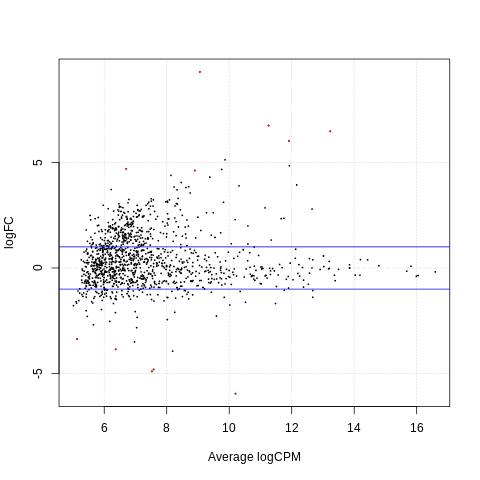

In [ ]:
%%R
#@title plot FC
# Plotea los genes en funcion de su FC y su acumulación en cpm (los puntos rojos son aquellos que dieron DA estadisticamente significativa)
detags <- rownames(d_mRNAs_fbe)[as.logical(de)]
plotSmear(et_mRNAs_fbe, de.tags=detags)
abline(h=c(-1, 1), col="blue")

#save plot
pdf(paste0("/content/plots/",sRNAtype[1],"_DEL.pdf"))
detags <- rownames(d_mRNAs_fbe)[as.logical(de)]
plotSmear(et_mRNAs_fbe, de.tags=detags)
abline(h=c(-1, 1), col="blue")
dev.off()

<a name="step-3.2"></a>
## Análisis de 24 nts

In [ ]:
%%R
#@title
for(t in 2:length(sRNAtype)){
  toKeep<-grep(sRNAtype[t], inFile, value=TRUE)
  subTarget<-targets[toKeep,]
  d_mRNAs <- readDGE(subTarget, path="/content/rawData")
  d_mRNAs
  ## asigna nombres a las columnas
  colnames(d_mRNAs) <- gsub(paste0("_",sRNAtype[t],".count"),"",colnames(d_mRNAs))
  d_mRNAs
  # muestra la dimension del objeto
  dim(d_mRNAs)
  ## filtra por expresion las cuentas en un numero minimo de muestras (3 en este caso porque el numero minimo de muestras en cada grupo)
  keep_mRNA_fbe <- filterByExpr(d_mRNAs)
  ## arma un nuevo objeto con las cuentas filtradas
  d_mRNAs_fbe <- d_mRNAs[keep_mRNA_fbe, keep.lib.sizes=FALSE]
  ## exploramos la nueva dimension del objeto
  dim(d_mRNAs_fbe)
  ## miramos el objeto filtrado
  d_mRNAs_fbe
  ## calcula un factor de escala para convertir las reads crudas a normalizadas
  ## un factor de normalizacion <1 indica que un reducido numero de genes tiene alto numero de cuentas las cuales monopolizaron las secuenciacion
  d_mRNAs_fbe <- calcNormFactors(d_mRNAs_fbe)
  ## exploramos el objeto normalizado
  d_mRNAs_fbe[["counts"]]
    ## plotea en un PCA las distancias entre los perfiles de expresion de las muestras en logFC
  ## MDS=Multidimensional scaling
  pdf(paste0("/content/plots/",sRNAtype[t],"_PCA.pdf"))
  plotMDS(d_mRNAs_fbe)
  dev.off()
  ## plotMDS.pdf
  # estimo la dispersion comun
  d_mRNAs_fbe <- estimateCommonDisp(d_mRNAs_fbe)
  # estimo la dispersiion especifica de genes
  d_mRNAs_fbe <- estimateTagwiseDisp(d_mRNAs_fbe)
  # estimo la dispersión de la tendencia de los genes
  d_mRNAs_fbe <- estimateTrendedDisp(d_mRNAs_fbe)
  ## exploramos las dispersiones
  d_mRNAs_fbe
  ## ploteamos el coeficiente de variacion biologica y las dispersiones
  pdf(paste0("/content/plots/",sRNAtype[t],"_BCV.pdf"))
  plotBCV(d_mRNAs_fbe)
  dev.off()
  #plotBCV.pdf
  et_mRNAs_fbe <- exactTest(d_mRNAs_fbe, dispersion = "tagwise")
  et_mRNAs_fbe
  topDEL<-topTags(et_mRNAs_fbe, n=300000) #Differentialy Expressed Loci
  write.table(topDEL,paste0("topTags_",sRNAtype[t],".csv"), quote=FALSE, sep="\t")
  
  #?
  sRNA_cpm<-cpm(d_mRNAs_fbe)[rownames (topDEL),]
  write.table(sRNA_cpm,paste0("cpm_",sRNAtype[t],".csv"), quote=FALSE, sep="\t")
  
  summary(de <- decideTestsDGE(et_mRNAs_fbe)) 
  
  pdf(paste0("/content/plots/",sRNAtype[t],"_DEL.pdf"))
  detags <- rownames(d_mRNAs_fbe)[as.logical(de)]
  plotSmear(et_mRNAs_fbe, de.tags=detags)
  abline(h=c(-1, 1), col="blue")
  dev.off()
}

In [ ]:
%%R
d_mRNAs_fbe

An object of class "DGEList"
$samples
             files group description lib.size norm.factors
12A 12A_24nt.count     A     2200mts   869927    0.9970999
18S 18S_24nt.count     S     1200mts  1525302    1.0011142
2S   2S_24nt.count     S     1200mts  1333854    1.0123801
4A   4A_24nt.count     A     2200mts   783079    0.9882417
7S   7S_24nt.count     S     1200mts  1005324    0.9883158
8A   8A_24nt.count     A     2200mts  1013933    1.0131533

$counts
                      Samples
Tags                   12A 18S 2S 4A 7S 8A
  PGSC0003DMG400000001  12  36 11 13 47  7
  PGSC0003DMG400000002  31  46 43 12 31 29
  PGSC0003DMG400000005  10  20 13  3  2 15
  PGSC0003DMG400000008   3  18 31 10 13 16
  PGSC0003DMG400000009  42  17 25 17 12 26
15989 more rows ...

$common.dispersion
[1] 0.07472956

$pseudo.counts
                      Samples
Tags                         12A      18S        2S        4A       7S
  PGSC0003DMG400000001 14.583025 24.82882  8.054519 17.409685 49.84484
  PGSC000

In [ ]:
%%R
dim(d_mRNAs_fbe)

[1] 15994     6


<a name="step-3.3"></a>
## Exploramos los datos

In [ ]:
# python imports & install
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!apt-get install poppler-utils > /dev/null
# pdf -> png
!pdftoppm /content/plots/21-22nt_PCA.pdf 21-22nt_PCA -png
!pdftoppm /content/plots/24nt_PCA.pdf 24nt_PCA -png
!pdftoppm /content/plots/21-22nt_BCV.pdf 21-22nt_BCV -png
!pdftoppm /content/plots/24nt_BCV.pdf 24nt_BCV -png
!pdftoppm /content/plots/21-22nt_DEL.pdf 21-22nt_DEL -png
!pdftoppm /content/plots/24nt_DEL.pdf 24nt_DEL -png
!ls 


21-22nt_BCV-1.png  24nt_BCV-1.png  cpm_21-22nt.csv	topTags_24nt.csv
21-22nt_DEL-1.png  24nt_DEL-1.png  cpm_24nt.csv
21-22nt_PCA-1.png  24nt_PCA-1.png  topTags_21-22nt.csv


# Plots:

**PCA** , **BCV** y **FC**


Comparamos los gráficos entre los resultados del análisis de sRNAs de 21-22nt asociados a genes vs. sRNAs de 24nt asociados a promotores.


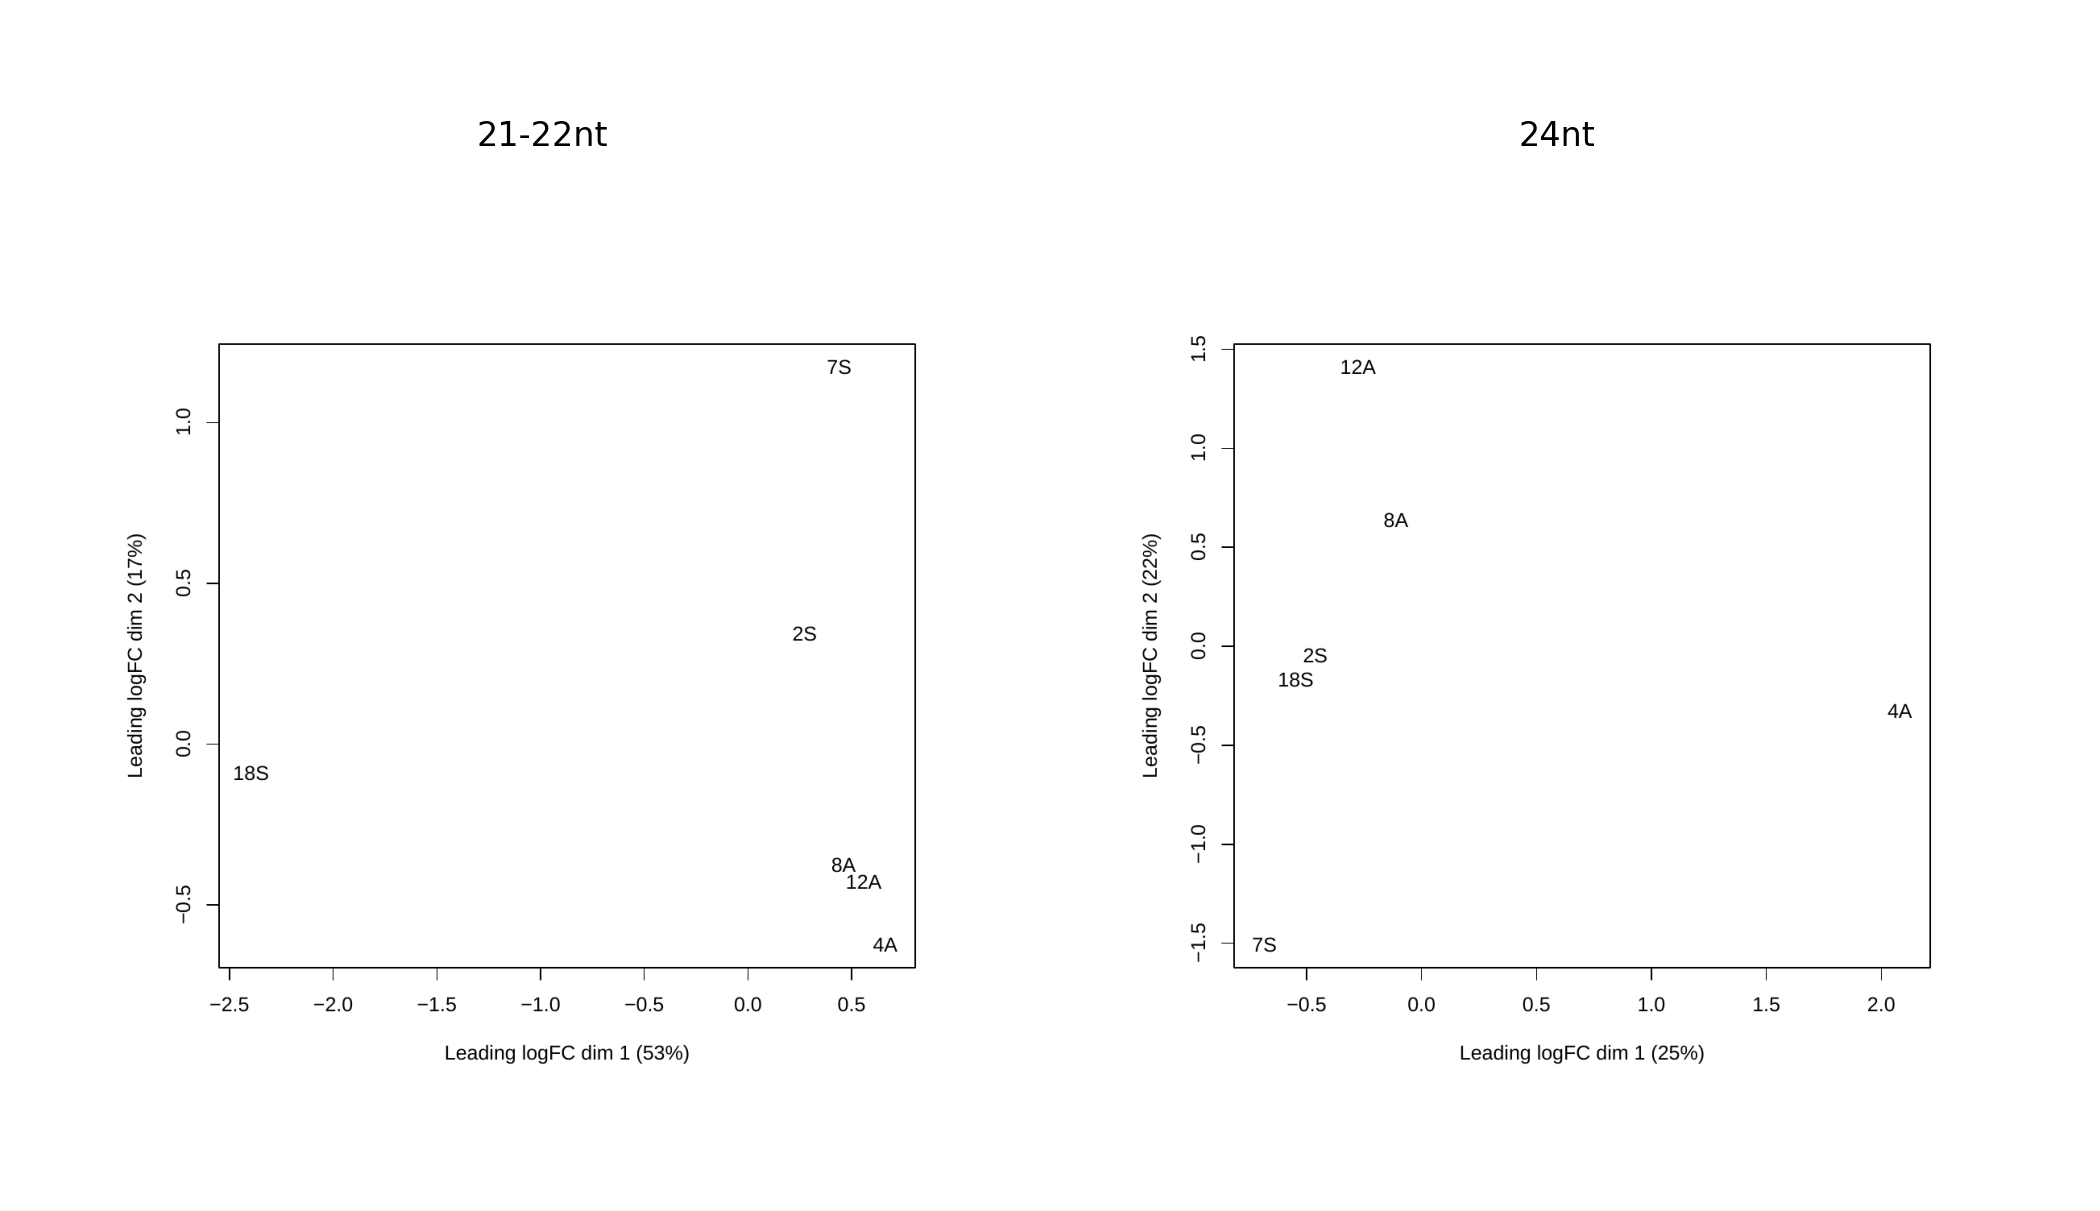

In [ ]:
figs, axs = plt.subplots(1, 2, dpi=1200, figsize=(2,2))

after_img  = mpimg.imread('21-22nt_PCA-1.png')
before_img = mpimg.imread('24nt_PCA-1.png')

axs[0].imshow(after_img)
axs[0].axis('off')
axs[0].title.set_size(2)
axs[0].title.set_text('21-22nt')

axs[1].imshow(before_img)
axs[1].axis('off')
axs[1].title.set_size(2)
axs[1].title.set_text('24nt')
plt.show()

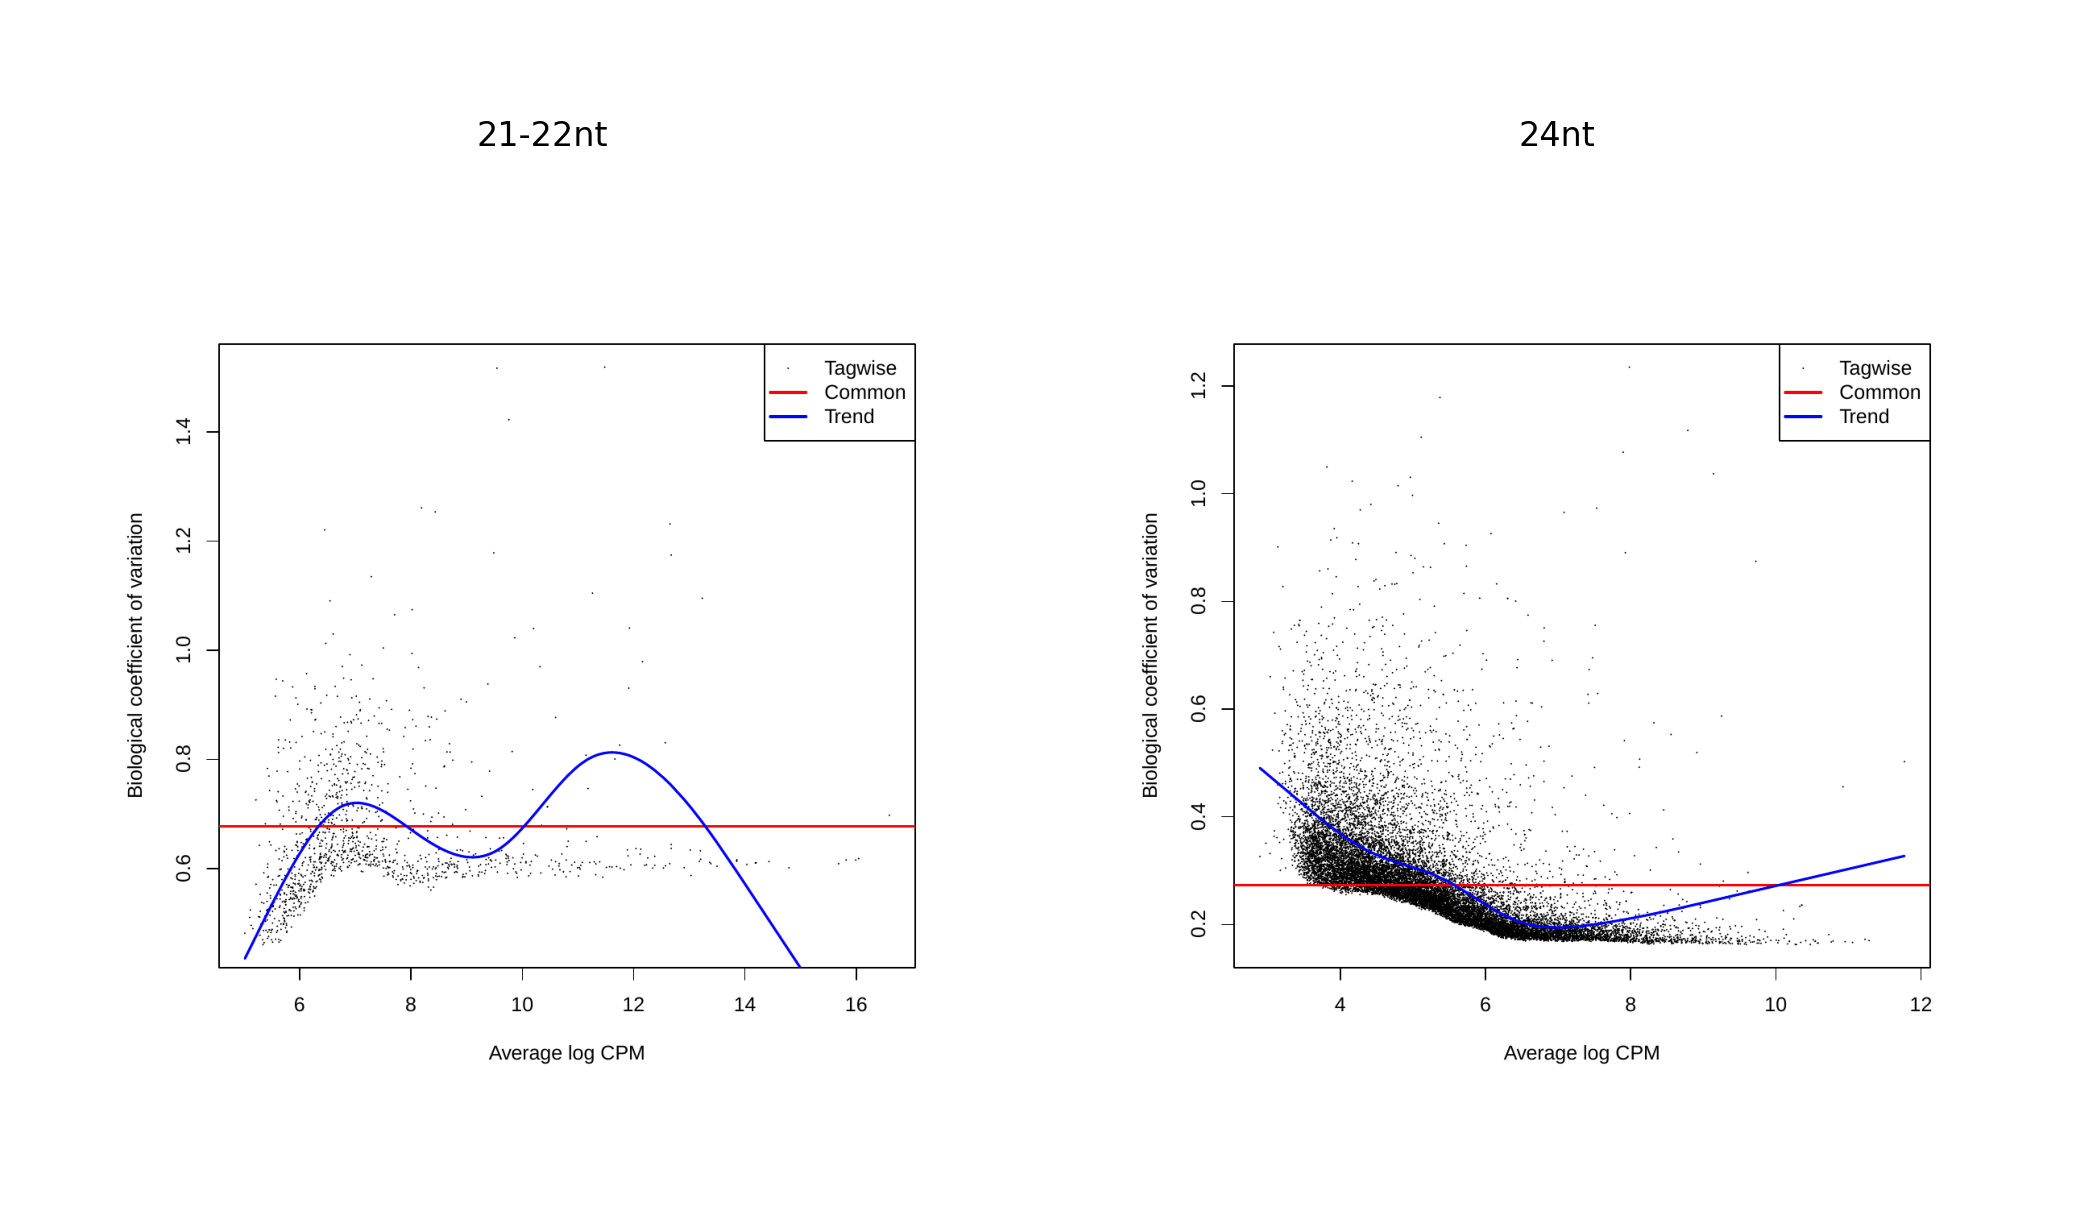

In [ ]:
figs, axs = plt.subplots(1, 2, dpi=1200, figsize=(2,2))

after_img  = mpimg.imread('21-22nt_BCV-1.png')
before_img = mpimg.imread('24nt_BCV-1.png')


axs[0].imshow(after_img)
axs[0].axis('off')
axs[0].title.set_size(2)
axs[0].title.set_text('21-22nt')

axs[1].imshow(before_img)
axs[1].axis('off')
axs[1].title.set_size(2)
axs[1].title.set_text('24nt')
plt.show()

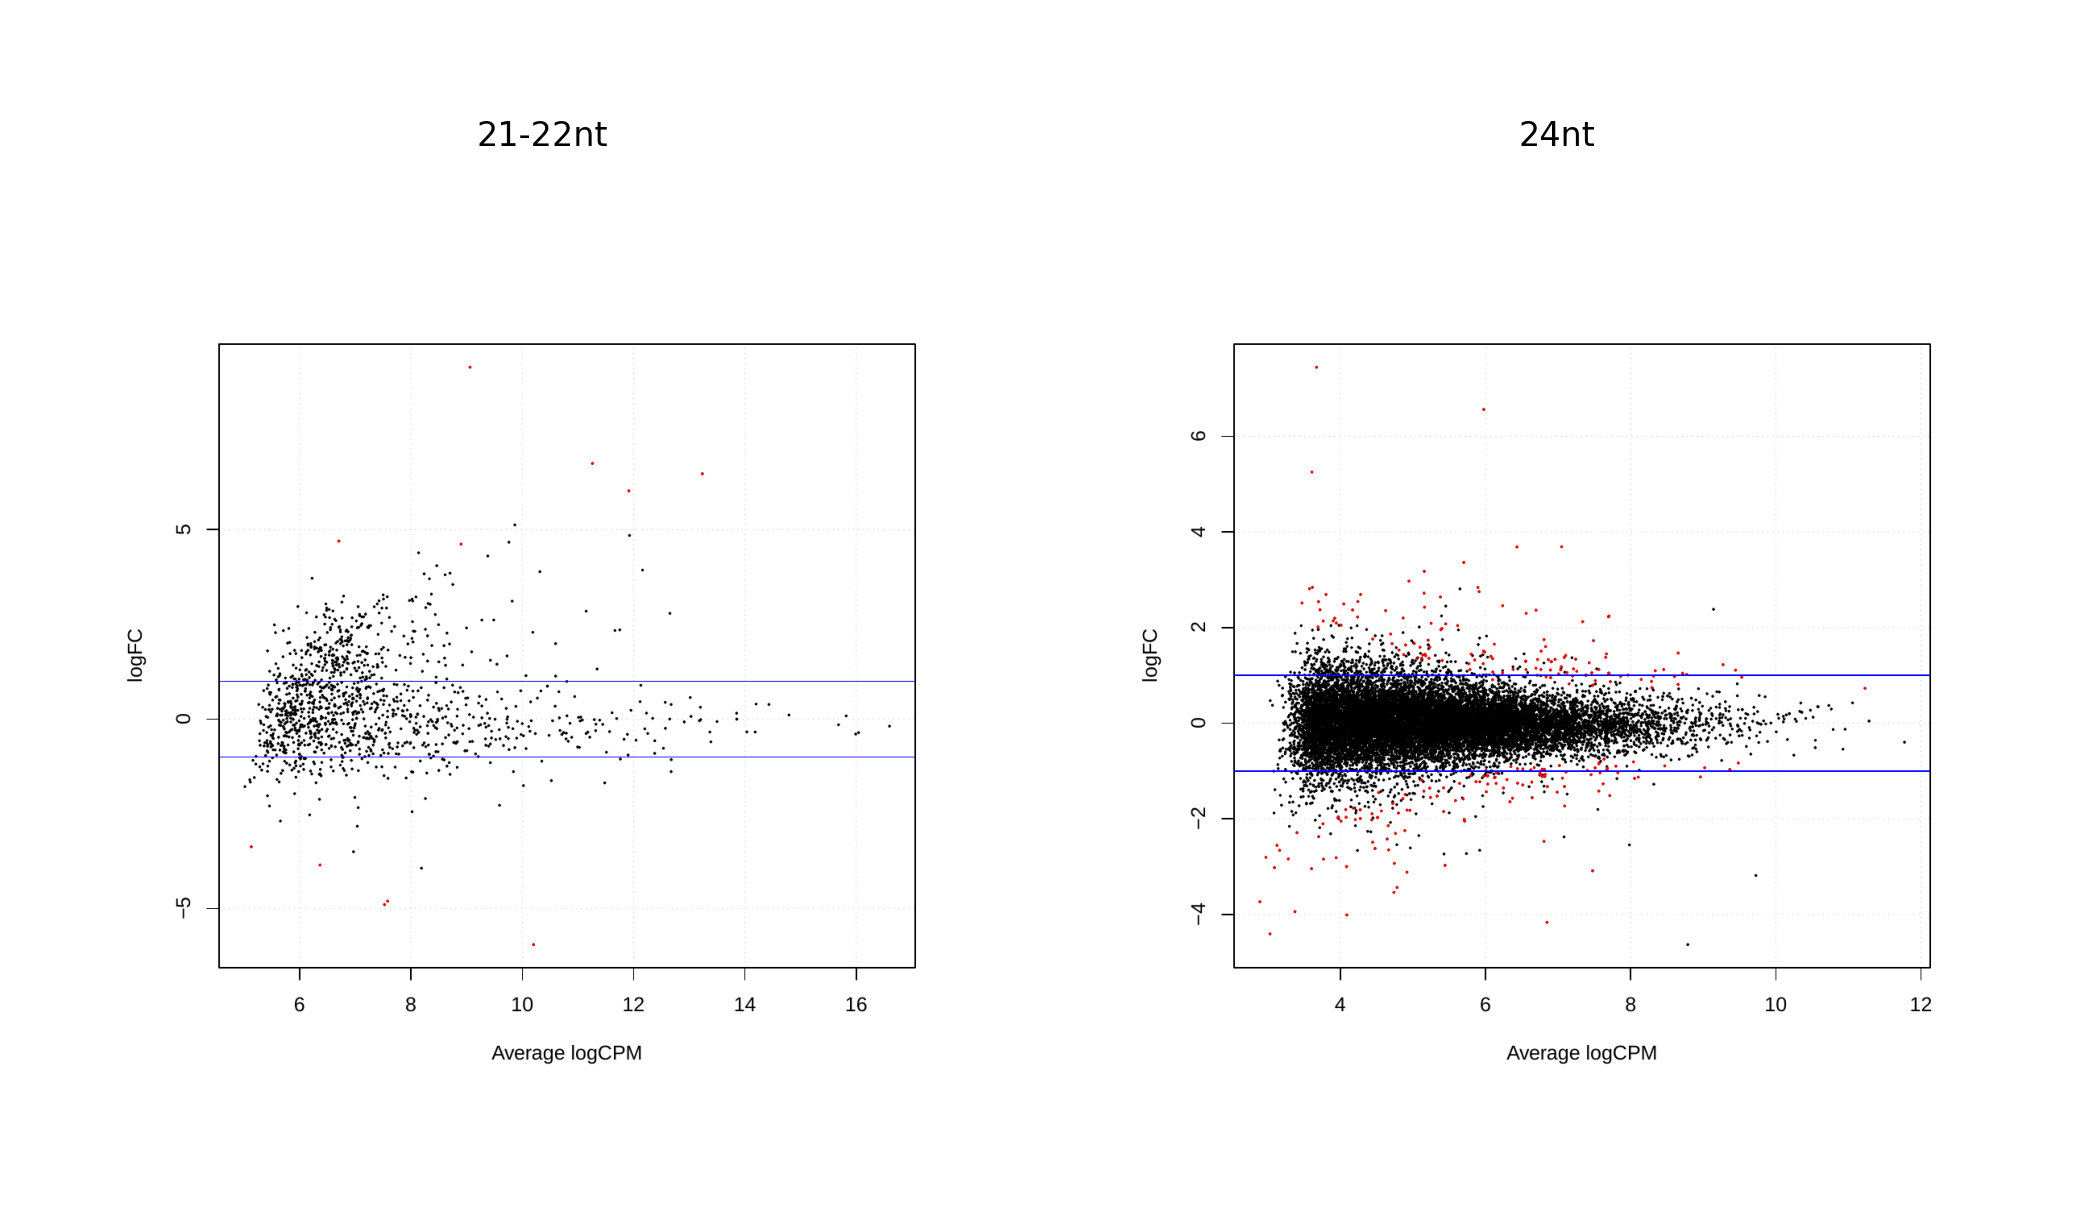

In [ ]:
figs, axs = plt.subplots(1, 2, dpi=1200, figsize=(2,2))

after_img  = mpimg.imread('21-22nt_DEL-1.png')
before_img = mpimg.imread('24nt_DEL-1.png')


axs[0].imshow(after_img)
axs[0].axis('off')
axs[0].title.set_size(2)
axs[0].title.set_text('21-22nt')

axs[1].imshow(before_img)
axs[1].axis('off')
axs[1].title.set_size(2)
axs[1].title.set_text('24nt')
plt.show()

# Archivos:

**TopTags** y **cpm**

**TopTags** contiene 5 columnas con la información de la expresión (o acumulación diferencial de sRNAs en los "features" (en la caso de los 21-22nt genes, mientras que en los datos de 24nt promotres).
- **ID de los features**: nombre o identificador de cada "feature"
- **logFC**: el log del "fold change" (ratio) para cada "feature" (tag) entre los dos grupos analizados
- **logCPM**: el log del promedio de la abundancia en cpm para cada "feature" (tag) entre los dos grupos analizados 
- **PValue**: el p-valor de la expresión diferencial usando el modelo binomial negativo
- **FDR**: el p-valor ajustado por comparaciones múltiples (False Discovery Rate)

**cpm** contiene 7 columnas (en este caso) correspondientes al ID de los "features" y las cuentas por millón (cpm) de cada muestra


Comparamos los archivos TopTags de dos los análisis realizados:

genes con acumulacion diferencial (DA) de sRNAs de 21-22nt vs. promotores con DA de sRNAs de 24nt.



In [ ]:
%%bash
echo -e "ID\t\t\tlogFC\t\t\tlogCPM\t\tPvalue\t\t\tFDR"
sed 1d topTags_21-22nt.csv | head -n20 | tr ',' '\t' | column -t 

ID			logFC			logCPM		Pvalue			FDR
PGSC0003DMG400001215  9.28847409338733   9.06123083501284  1.90906126140728e-12  2.33860004522392e-09
PGSC0003DMG400010983  -4.80826883138242  7.58108675065355  1.41106611357523e-05  0.00757555265507086
PGSC0003DMG400004552  6.02480071583824   11.9132818132589  1.85523738491531e-05  0.00757555265507086
PGSC0003DMG400016867  -3.85477066782646  6.36592826797706  3.79748438746881e-05  0.00978656615490648
PGSC0003DMG401018057  -4.89929457694134  7.5256413276485   3.99451679792101e-05  0.00978656615490648
PGSC0003DMG400016374  -3.37102107034012  5.13171617469024  6.15183042976526e-05  0.0125599871274374
PGSC0003DMG400006075  4.69831089451515   6.70437830675803  7.48783481887879e-05  0.0131037109330379
PGSC0003DMG400030885  6.74789644630388   11.2607438021184  0.000110390644778144  0.0169035674816533
PGSC0003DMG402022617  6.47396612671238   13.2340962606058  0.000142729475774581  0.0194270675359847
PGSC0003DMG400004057  -5.95561592265734  10.2021050140221  0

In [ ]:
%%bash

echo -e "ID\t\t\tlogFC\t\t\tlogCPM\t\tPvalue\t\t\tFDR"
sed 1d topTags_24nt.csv | head -n20 | tr ',' '\t' | column -t 

ID			logFC			logCPM		Pvalue			FDR
PGSC0003DMG400024016  -4.1652556680842   6.84676506454641  5.01553009036467e-29  8.02183882652926e-25
PGSC0003DMG400019238  6.56228432892587   5.97448629292892  8.36603581490484e-19  6.6903188411794e-15
PGSC0003DMG400017022  3.68984524350727   7.04745097559475  1.66107430189542e-17  8.85574079483847e-14
PGSC0003DMG400000104  2.83830952023452   5.89457627690996  6.82792020566198e-15  2.73014389423394e-11
PGSC0003DMG400009427  2.1230136692644    7.33859619718895  4.81306095053129e-14  1.53960193685595e-10
PGSC0003DMG400046459  -2.97281387377347  5.44163765986563  6.15717421565046e-14  1.64129740675189e-10
PGSC0003DMG400015153  -3.43490328121442  4.78153450839471  6.31321238399737e-12  1.44247884099506e-08
PGSC0003DMG400013811  -4.0112070143098   4.08881733126768  2.01375038898726e-11  4.02599046518278e-08
PGSC0003DMG400006910  2.22721708152896   7.69267540611862  2.97085793632992e-11  5.27954464818453e-08
PGSC0003DMG400006945  2.24080425739433   7.701432


¿Cuál tuvo mas features diferencialmente acumulados con FDR < 0.05?

 21-22nt

```
        S-A
Down      5
NotSig 1214
Up        6
```

In [ ]:
%%R
summary(de <- decideTestsDGE(et_mRNAs_fbe)) 

         S-A
Down     129
NotSig 15729
Up       136


In [ ]:
%%bash
echo -e "ID\t\t\t12A\t\t\t4A\t\t8A\t\t2S\t\t7S\t\t\t18S"
awk '{print $1"\t"$4"\t"$6"\t"$3"\t"$5"\t"$7"\t"$2}' cpm_21-22nt.csv | sed 1d | head -n20 |tr ',' '\t' | column -t 

 

ID			12A			4A		8A		2S		7S			18S
PGSC0003DMG400001215  441.148445256695  1220.31322812019  1495.16455369027  0                 3.71618025018034  0
PGSC0003DMG400010983  36.4585491947681  4.28180080042171  0                 545.779550844655  278.713518763525  255.992592911973
PGSC0003DMG400004552  1290.63264149479  7043.56231669372  14408.9382736796  255.563440474878  0                 93.4576132853233
PGSC0003DMG400016867  0                 12.8454024012651  14.5044257431554  168.931765737631  167.228111258115  101.584362266656
PGSC0003DMG401018057  36.4585491947681  0                 0                 498.132129739169  274.997338513345  268.182716383971
PGSC0003DMG400016374  3.64585491947681  4.28180080042171  6.04351072631475  51.9790048423481  40.8779827519837  73.1407408319922
PGSC0003DMG400006075  61.9795336311058  64.2270120063257  425.463155132558  12.994751210587   3.71618025018034  4.06337449066623
PGSC0003DMG400030885  47.3961139531986  94.1996176092777  14382.3468264838  69.3

In [ ]:
%%bash
echo -e "ID\t\t\t12A\t\t\t4A\t\t8A\t\t2S\t\t7S\t\t\t18S"
awk '{print $1"\t"$4"\t"$6"\t"$3"\t"$5"\t"$7"\t"$2}' cpm_24nt.csv | sed 1d | head -n20 |tr ',' '\t' | column -t 
 

ID			12A			4A		8A		2S		7S			18S
PGSC0003DMG400024016  8.88647124892963  20.1292787696902  8.51341665210587  165.402167356292  292.036300347566  193.681344534264
PGSC0003DMG400019238  49.6161311398571  221.422066466592  86.4439229290749  2.58440886494207  0                 1.15286514603728
PGSC0003DMG400017022  343.610221625279  271.745263390818  103.470756233287  16.7986576221234  15.5752693518702  23.0573029207457
PGSC0003DMG400000104  81.4593197818549  105.678713540874  110.019538273368  6.46102216235517  14.6018150173783  19.5987074826338
PGSC0003DMG400009427  221.421241952497  306.971501237776  248.198839319086  51.6881772988414  79.8232554283347  44.961740695454
PGSC0003DMG400046459  13.3297068733944  5.03231969242256  9.82317306012215  69.7790393534359  64.2479860764645  95.6878071210945
PGSC0003DMG400015153  1.48107854148827  7.04524756939158  5.23902563206515  36.181724109189   54.5134427315456  56.4903921558269
PGSC0003DMG400013811  1.48107854148827  2.01292787696902  1.964634

<a name="step-4"></a>
# OPCIONAL: Guardar en Drive

Opcional. 
Depende del espacio disponible en Drive.

Si desea copiar los datos, **EXCEPTO**  para la primera línea ``#@title``, debe eliminar el numeral (`#`) de cada línea de código.

In [ ]:
%%bash
echo 'Usted está en:'
pwd

Usted está en:
/content/results


In [ ]:
#@title Guardar archivos en el Drive personal
%%bash
#mkdir ../drive/MyDrive/EpiEvo/TP_5
#cd ..
#echo 'Usted está en:'
#pwd
#echo 'Lista de archivos en colab:'
#ls
#cp -r {plots,rawData,results} drive/MyDrive/EpiEvo/TP_5/
#echo 'Lista de archivos en TP_5 en su drive:'
#ls drive/MyDrive/EpiEvo/TP_5/